In [ ]:
import os
import glob
import nibabel as nib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image
from tqdm import tqdm

import csv

In [ ]:
DATA_DIR = "/Volumes/SSD970/"

SEG_DIR = os.path.join(DATA_DIR, "segmentations")
LABEL_DIR = os.path.join(DATA_DIR, "segmentation_sagittal_xray_labels")

In [ ]:
def read_patient_nii_mask(UID, seg_dir):
    nii_path = os.path.join(seg_dir, f"{UID}.nii")
    seg_mask = nib.load(nii_path).get_fdata()
    seg_mask = np.rot90(seg_mask, axes=(0, 1))
    seg_mask = seg_mask.transpose((2, 0, 1))
    seg_mask = np.flip(seg_mask, axis=0)
    seg_mask[seg_mask > 7] = 0
    return seg_mask

In [4]:
xray_df = pd.read_csv(os.path.join(DATA_DIR, 'meta_xray.csv')).set_index('UID')
xray_df.head()

,direction,z_spacing,pixel_spacing,aspect,width,height
UID,,,,,,
1.2.826.0.1.3680043.10005,0,0.625,0.298828,2.091504,512,512
1.2.826.0.1.3680043.10005,1,0.625,0.298828,2.091504,512,541
1.2.826.0.1.3680043.10005,2,0.625,0.298828,2.091504,512,541
1.2.826.0.1.3680043.10014,0,0.800,0.234000,3.418803,512,512
1.2.826.0.1.3680043.10014,1,0.800,0.234000,3.418803,512,882


In [12]:
UID = "1.2.826.0.1.3680043.1363"
masks = read_patient_nii_mask(UID, SEG_DIR)
masks.shape

(199, 512, 512)

In [6]:
xray_seg = masks.max(axis=2)
aspect = xray_df.loc[UID].iloc[0].aspect

In [7]:
seg_label = Image.fromarray(np.uint8(xray_seg / 8 * 256) , 'L')

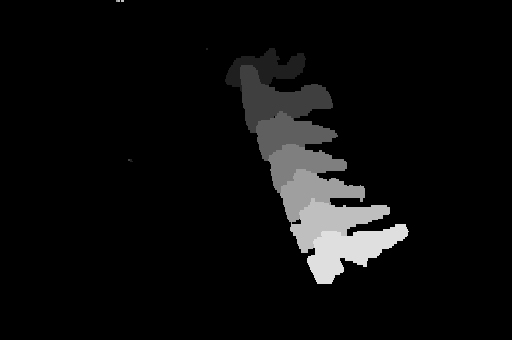

In [11]:
resized = seg_label.resize((seg_label.width, int(seg_label.height * aspect)), resample=Image.NEAREST)
resized

In [13]:
resized.save(os.path.join(LABEL_DIR, f"{UID}.png"))

In [14]:
nii_paths = glob.glob(os.path.join(DATA_DIR, 'segmentations') + '/*.nii')
for nii_path in tqdm(nii_paths):
    UID = nii_path.split("/")[-1].replace(".nii","")
    masks = read_patient_nii_mask(UID, SEG_DIR)
    xray_seg = masks.max(axis=2)
    aspect = xray_df.loc[UID].iloc[0].aspect
    seg_label = Image.fromarray(np.uint8(xray_seg / 8 * 256) , 'L')
    resized = seg_label.resize((seg_label.width, int(seg_label.height * aspect)), resample=Image.NEAREST)
    resized.save(os.path.join(LABEL_DIR, f"{UID}.png"))

100%|██████████| 87/87 [01:34<00:00,  1.08s/it]
